In [5]:
!pip install pandas 
!pip install tweepy
!pip install vaderSentiment

     |████████████████████████████████| 133kB 5.0MB/s 


In [6]:
!pip install twython
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

  Stored in directory: /root/.cache/pip/wheels/c2/b0/a3/5c4b4b87b8c9e4d99f1494a0b471f0134a74e5fb33d426d009
Successfully built twython


In [0]:
consumer_key = 'Your Twitter Account consumer key here...'
consumer_secret = 'Your Twitter Account consumer secret here...'
access_token = 'Your Access token here...'
access_token_secret = 'Your Access token secret here...'




In [0]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth)


In [0]:
import re
def clean_tweet(tweet):
  #We will remove links and special characters using regex
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)"," ",tweet).split())

In [25]:
tweets = api.search('Cloudy Modi',count = 200)

data = pd.DataFrame(data=[clean_tweet(tweet.text) for tweet in tweets],columns = ['Tweets'])

display(data.head(10))

print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

,Tweets
0,nitin sourav97 Sun be baklandi k Kodak digital...
1,RT Here s what you d see question no 27 Unfort...
2,RT nafsak sharma Aladeen Chacha uski kya zaroo...
3,RT One Cloudy day I got a call from Bakendra M...
4,RT Here s what you d see question no 27 Unfort...
5,RT krishnan A friend on FB put it well If Modi...
6,sharma Aladeen Chacha uski kya zaroorat hai aa...
7,Phle cloudy modi ko hindu qubool krva le dalle
8,RT LokSabhaElections2019 https t co vmpJiYC2YI
9,RT Here s what you d see question no 27 Unfort...


1127996839507087360
2019-05-13 17:59:38
Twitter for Android
0
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': '3g48J6DD1LexmJb', 'name': 'अभय सिंह शेखावत', 'id': 1107267778585591808, 'id_str': '1107267778585591808', 'indices': [0, 16]}, {'screen_name': 'parkash_nitin', 'name': 'Nitin Parkash Kejriwal inc', 'id': 1113309234169470976, 'id_str': '1113309234169470976', 'indices': [17, 31]}, {'screen_name': 'bh_sourav97', 'name': 'Sourav bhardwaj', 'id': 821645293561188352, 'id_str': '821645293561188352', 'indices': [32, 44]}, {'screen_name': 'INCIndia', 'name': 'Congress', 'id': 1153045459, 'id_str': '1153045459', 'indices': [45, 54]}, {'screen_name': 'MdAshik48946799', 'name': 'Md Ashik', 'id': 1118778045010046976, 'id_str': '1118778045010046976', 'indices': [55, 71]}], 'urls': [{'url': 'https://t.co/Ydk1FYsXO4', 'expanded_url': 'https://twitter.com/i/web/status/1127996839507087360', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


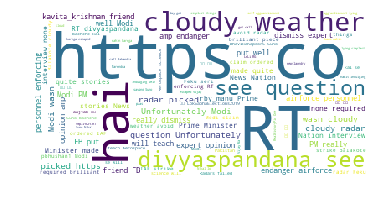

In [26]:
!pip install matplotlib
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tc = tweepy.Cursor(api.search,q = "Cloudy Modi",lang = "en").items(200)
cloud = ""
for each in tweets:
  cloud = cloud + each.text
cloud = WordCloud(background_color="white").generate(cloud)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [14]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
sid = SentimentIntensityAnalyzer()

list = []

for index,row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  list.append(ss)
se = pd.Series(list)
data["Polarity"] = se.values

display(data.head(100))


,Tweets,Polarity
0,jiss desh me bacha baccha modi ke sath ho usko...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,haha pahle baap pak politicians gali deta tha ...,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp..."
2,Chachi ji pahle apna parichay to dijiye Aaj bh...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,RT 24 Janta ki pareshani Jumie a,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,RT 24 Janta ki pareshani Jumie a,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,Mera desh Hindu Muslim ke naam par use todne b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,Modi ji haren ya jeeten par Unki Naitik haar h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,Desh ki janta to modi ke sath hai apni dekh lo,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,singh11 https t co cP4xEzCcwA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,amzad bhai ne bahot acha kaam kiya hai mai des...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
